<a href="https://colab.research.google.com/github/malh718/datasci_6_regression/blob/main/beans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo


In [ ]:
import pandas as pd
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt


# Linear Regression

In [ ]:
from ucimlrepo import fetch_ucirepo



In [ ]:
dry_bean_dataset = fetch_ucirepo(id=602)


In [ ]:

# data (as pandas dataframes)
df = dry_bean_dataset.data.features
df



,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
# Fit the regression model
X = sm.add_constant(df['Extent'])  # Adds a constant term to the predictor
print(X)
model = sm.OLS(df['Compactness'], X)
print(model)


       const    Extent
0        1.0  0.763923
1        1.0  0.783968
2        1.0  0.778113
3        1.0  0.782681
4        1.0  0.773098
...      ...       ...
13606    1.0  0.714574
13607    1.0  0.799943
13608    1.0  0.729932
13609    1.0  0.705389
13610    1.0  0.788962

[13611 rows x 2 columns]


In this example the Compactness is the dependent variable and the indepent variables is the Extent.

In [ ]:
# print summary of results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Compactness   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     1952.
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:11:19   Log-Likelihood:                 19510.
No. Observations:               13611   AIC:                        -3.902e+04
Df Residuals:                   13609   BIC:                        -3.900e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4660      0.008     61.538      0.0

The r squared is .125 which is 12.5 and shows that when it comes to compactness extent does not affect variability by alot.

In [ ]:
residuals = results.resid
residuals
fitted = results.fittedvalues


In [ ]:
##### CHECKING ASSUMPTIONS #####

### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=2.293642704044083, p-value=3.406720382516076e-250


In this example, the stat is 2.239 and the p value is extremely small and close to zero. What this indicates is that we can reject the null hypothesis.

In [ ]:
residuals

0        0.107175
1        0.138751
2        0.096272
3        0.113792
4        0.160247
           ...   
13606    0.017659
13607    0.000028
13608    0.031684
13609    0.037341
13610   -0.032337
Length: 13611, dtype: float64

In [ ]:
fitted

0        0.806183
1        0.815110
2        0.812502
3        0.814537
4        0.810269
           ...   
13606    0.784207
13607    0.822224
13608    0.791046
13609    0.780116
13610    0.817334
Length: 13611, dtype: float64

In [ ]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")


Shapiro-Wilk Test: W=0.996713399887085, p-value=7.6304208664685e-17


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


 The P value is very small. Since the p value is 7.63xe--17, we know that residuals are not distributed properly

In [ ]:
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")



Goldfeld-Quandt Test: F-statistic=0.1806791713822503, p-value=0.9999999999999999


In this instance the pvalue is .9999 which is very close to 1. This shows that these groups are similar and that the homogenity assumption  is met.

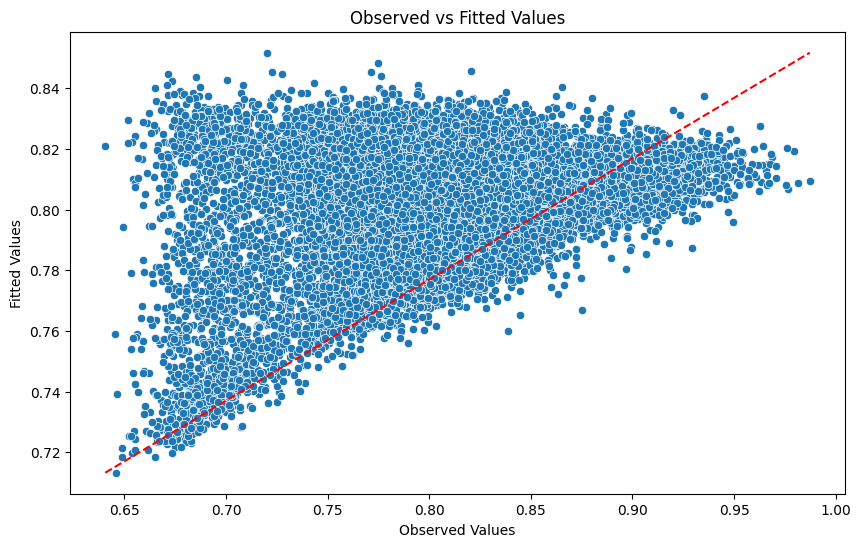

In [ ]:

## A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Compactness'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['Compactness']), max(df['Compactness'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()


In [ ]:


### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")


Shapiro-Wilk Test: W=0.996713399887085, p-value=7.6304208664685e-17


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The W is .996 and the p value is 7.6e-17. The p value is extremely low and we can reject the null hypothesis. This does not follow normal distrubition. The normality of the residuals is not present here.

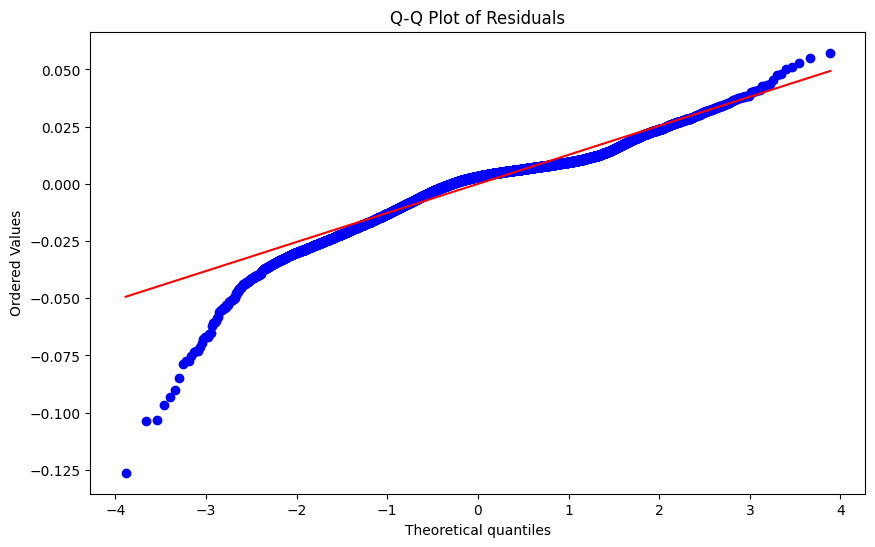

In [ ]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()



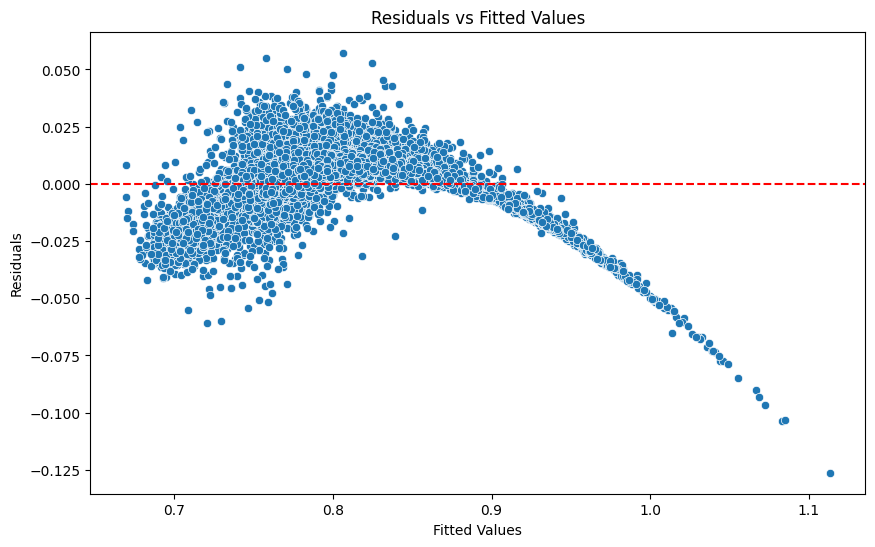

In [ ]:
# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Multiple Linear Regression


In [ ]:
listofpredictors= df[['Perimeter','Roundness','Eccentricity','Extent','Solidity']]
listofpredictors

,Perimeter,Roundness,Eccentricity,Extent,Solidity
0,610.291,0.958027,0.549812,0.763923,0.988856
1,638.018,0.887034,0.411785,0.783968,0.984986
2,624.110,0.947849,0.562727,0.778113,0.989559
3,645.884,0.903936,0.498616,0.782681,0.976696
4,620.134,0.984877,0.333680,0.773098,0.990893
...,...,...,...,...,...
13606,759.696,0.916603,0.765002,0.714574,0.990331
13607,757.499,0.922015,0.735702,0.799943,0.990752
13608,759.321,0.918424,0.734065,0.729932,0.989899
13609,763.779,0.907906,0.741055,0.705389,0.987813


In [ ]:
# Fit the regression model
X = sm.add_constant(listofpredictors)  # Adds a constant term to the predictor
print(X)
model = sm.OLS(df['Compactness'], X)
print(model)


       const  Perimeter  Roundness  Eccentricity    Extent  Solidity
0        1.0    610.291   0.958027      0.549812  0.763923  0.988856
1        1.0    638.018   0.887034      0.411785  0.783968  0.984986
2        1.0    624.110   0.947849      0.562727  0.778113  0.989559
3        1.0    645.884   0.903936      0.498616  0.782681  0.976696
4        1.0    620.134   0.984877      0.333680  0.773098  0.990893
...      ...        ...        ...           ...       ...       ...
13606    1.0    759.696   0.916603      0.765002  0.714574  0.990331
13607    1.0    757.499   0.922015      0.735702  0.799943  0.990752
13608    1.0    759.321   0.918424      0.734065  0.729932  0.989899
13609    1.0    763.779   0.907906      0.741055  0.705389  0.987813
13610    1.0    772.237   0.888380      0.786693  0.788962  0.989648

[13611 rows x 6 columns]


In this example the Compactness are the dependent variable and the indepent variables are the Extent, perimeter, roundess, eccentricity, extent and solidity.

In [ ]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Compactness   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 5.734e+04
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:18:12   Log-Likelihood:                 39656.
No. Observations:               13611   AIC:                        -7.930e+04
Df Residuals:                   13605   BIC:                        -7.925e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.9149      0.029     65.609   

The r^2 and Adj r^2 are both .955 or 95%. These show that the model makes sense and the independent variables listed above do affect the dependent. The F statisitic is 5.734e+04 and the Prob F statisitc is 0. This means the model is significant.

In [ ]:
residuals = results.resid
fitted = results.fittedvalues


In [ ]:
residuals

0       -0.015769
1       -0.043422
2       -0.010935
3       -0.030735
4       -0.084910
           ...   
13606    0.005764
13607    0.005541
13608    0.007759
13609    0.007613
13610    0.003330
Length: 13611, dtype: float64

In [ ]:
fitted

0        0.929126
1        0.997283
2        0.919709
3        0.959063
4        1.055426
           ...   
13606    0.796101
13607    0.816711
13608    0.814971
13609    0.809844
13610    0.781667
Length: 13611, dtype: float64

In [ ]:
##### CHECKING ASSUMPTIONS #####

### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=9.175869531886491, p-value=0.0


The stat is 9,17 and the p value is 0.0. Since the P value is 0 we reject the null hypothesis.

In [ ]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9338400363922119, p-value=0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The W is .9333 and the p value is 0. Since the P value is 0 we can reject the null and this indicates that the residuals are not distributed normally.

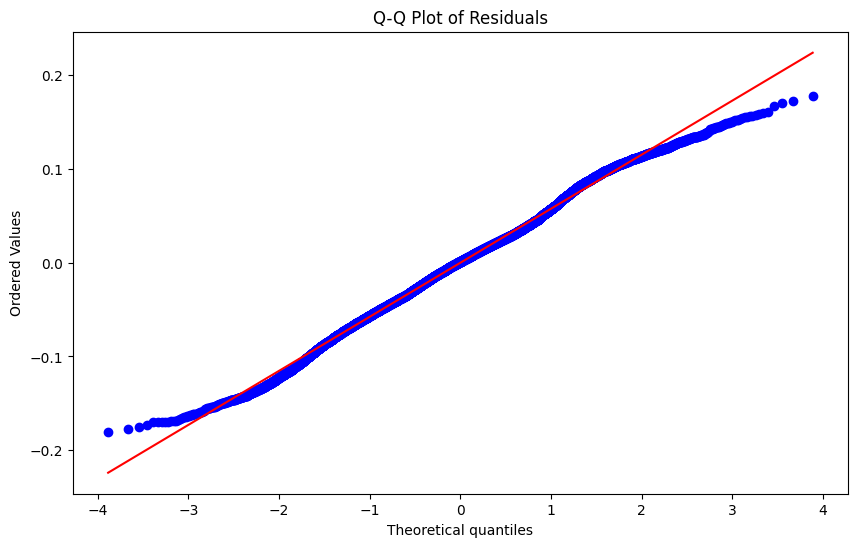

In [ ]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()



In [ ]:
##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")


Goldfeld-Quandt Test: F-statistic=0.18067917138224995, p-value=0.9999999999999999


The F statistic is .18 and the p value is .99999. What this means is that The p value is very close 1. This means that when it come to the homogenity of variance of the residuals is okay and we do not have to reject the null hypothesis.

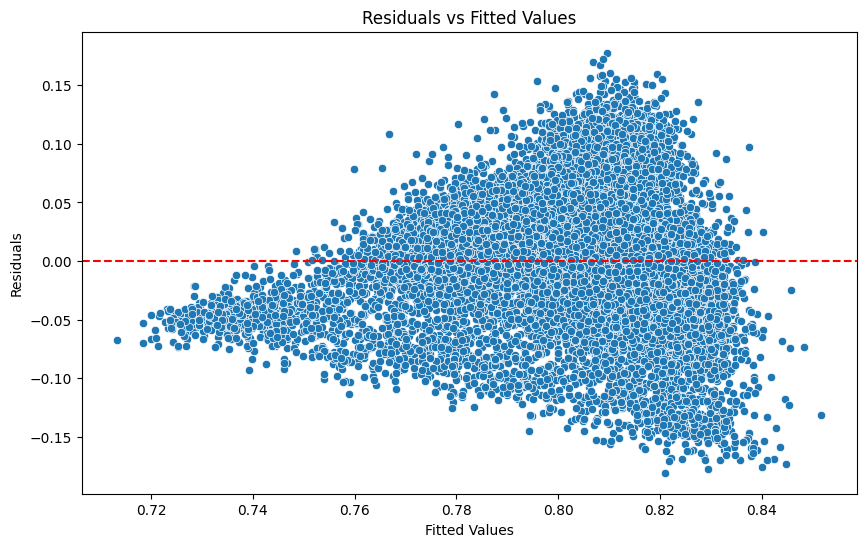

In [ ]:
# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

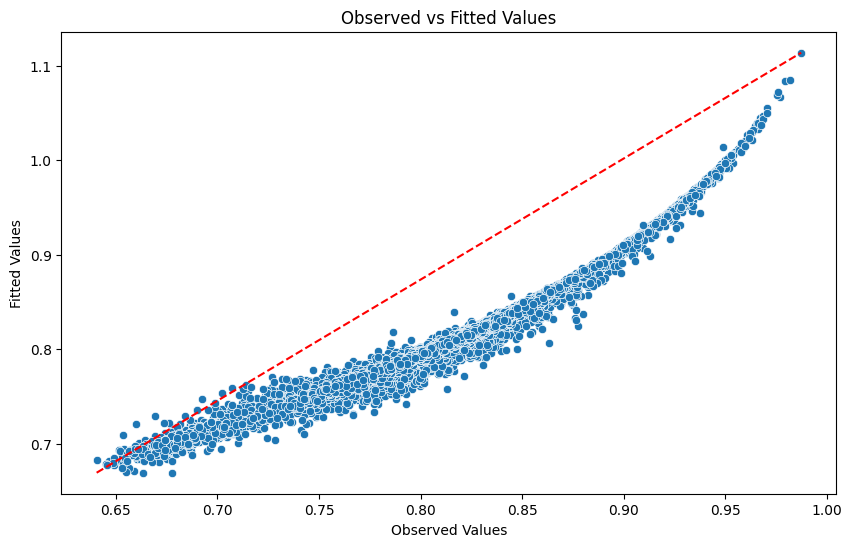

In [ ]:

## A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Compactness'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['Compactness']), max(df['Compactness'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()
